# Maps in Python
Kyle Kulas

Tutorial: https://medium.com/@minaienick/why-you-should-be-using-geopandas-to-visualize-data-on-maps-aka-geo-visualization-fd1e3b6211b4

Data: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [94]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [95]:
file_path = 'data/states/cb_2018_us_state_5m.shx'
map_us = gpd.read_file(file_path)
map_us.sort_values('GEOID').head(60)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
55,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
28,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
52,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.55929 36.499..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
31,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
40,09,01779780,0400000US09,09,CT,Connecticut,00,12542497068,1815617571,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."
29,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ..."
46,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.10450 38.946..."
38,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ..."


In [96]:
map_us.dtypes

STATEFP       object
STATENS       object
AFFGEOID      object
GEOID         object
STUSPS        object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

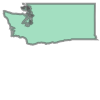

In [97]:
map_us['geometry'][1]

In [98]:
map_us['GEOID'] = map_us['GEOID'].map(int)

In [99]:
filtered_map_us = map_us[(map_us['GEOID']<56) & (map_us['GEOID']>=2) & (-map_us['GEOID'].isin((2,15)))]

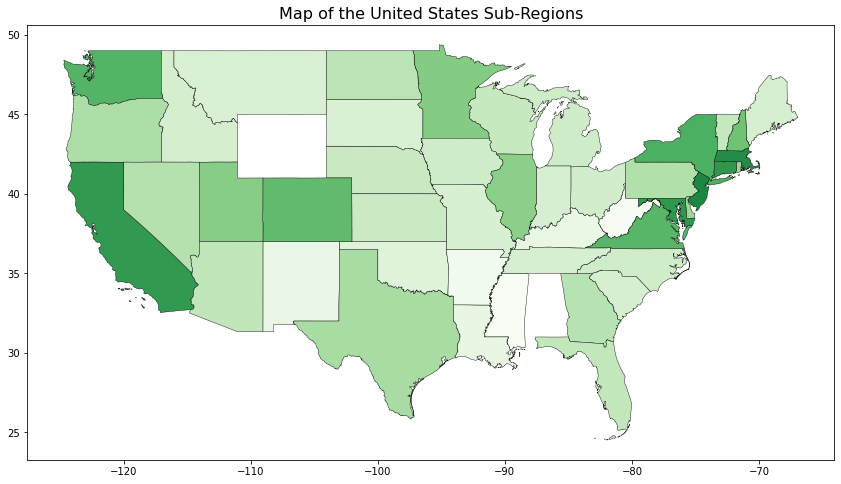

In [111]:
# Creating a subplot, with 'fig' and 'ax'
fig, ax = plt.subplots(1, figsize=(15, 8))
# Sending the filtered dat to plot
plt.title('Map of the United States Sub-Regions', size=16)

# to plot state outlines
'''filtered_map_us.plot(                                                    
             color='white',      # Colormap for the states                     
             linewidth=0.4,      # line width for state borders
             ax=ax,              # plotting the map on 'ax'
             edgecolor='black'); # State border colors'''


# to plot mean income per state
income_df = pd.read_csv('data/ACSST1Y2019.S1902_data_with_overlays_2021-11-09T192714.csv', header=1)
income_df = income_df[['id','Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households']]
income_df = income_df.rename(columns={'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households':'mean'})
income_df = income_df[:-2]
income_df['id'] = income_df['id'].str[-2:].astype('int64')
merged_df = pd.merge(filtered_map_us, income_df, left_on='GEOID', right_on='id')


merged_df.plot(column='mean',
            cmap='Greens',      # Colormap for the states                     
             linewidth=0.4,      # line width for state borders
             ax=ax,              # plotting the map on 'ax'
             edgecolor='black'); # State border colors

<Figure size 432x288 with 0 Axes>